In [2]:
import torch
from torch import nn
import torch.nn as nn
import numpy as np
import pandas as pd
import warnings
from functools import reduce
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import statsmodels.api as sm
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
df = pd.read_excel("merged_file.xlsx")
df.describe()
# df.isnull().sum()

,城市名称,年份,常住人口（万人）,户籍人口（万人）,urbanizationRate,unemploymentRate,employeesNumber,pi_Employment,si_Employment,ti_Employment,averageWage,人均可支配收入,人均消费支出,城镇居民人均收入,城镇居民消费支出,农村居民人均收入,农村居民消费支出
count,887.000000,887.000000,698.000000,711.000000,675.000000,768.000000,690.000000,698.000000,698.000000,698.000000,791.000000,176.000000,184.000000,361.000000,297.000000,288.000000,224.000000
mean,20.365276,2011.384442,562.230659,489.670886,62.576296,2.724740,329.836232,57.813754,128.249284,120.144699,42146.007585,38346.727273,27766.788043,40357.867036,25965.892256,24017.364583,15430.174107
std,11.568895,6.405759,297.216759,217.700793,15.060551,0.743954,184.383201,47.650958,94.859154,109.231149,27052.463737,14291.778093,32170.332060,14764.496089,8768.173732,12381.196581,6103.617293
min,1.000000,2000.000000,0.000000,0.000000,32.000000,0.000000,55.000000,0.000000,16.000000,9.000000,6176.000000,13280.000000,9976.000000,14735.000000,8368.000000,6316.000000,4578.000000
25%,10.000000,2006.000000,369.250000,342.500000,51.000000,2.000000,209.000000,20.000000,55.000000,54.000000,19862.000000,25599.000000,18365.750000,28275.000000,18447.000000,14887.000000,10817.250000
50%,20.000000,2011.000000,491.000000,461.000000,63.000000,3.000000,285.000000,55.000000,101.000000,91.500000,35496.000000,38002.000000,25082.500000,38670.000000,25260.000000,20973.000000,14781.500000
75%,30.000000,2017.000000,728.750000,648.500000,71.000000,3.000000,418.750000,80.000000,178.000000,146.750000,58868.000000,49448.000000,31801.500000,50650.000000,32356.000000,30646.000000,19910.000000
max,40.000000,2022.000000,1870.000000,1045.000000,100.000000,5.000000,1245.000000,216.000000,515.000000,839.000000,138004.000000,70842.000000,446007.000000,76195.000000,48628.000000,67707.000000,30568.000000


In [4]:
real_data = pd.read_excel('new_modified_file.xlsx')
real_data.describe()

,城市名称,年份,常住人口（万人）,户籍人口（万人）,urbanizationRate,unemploymentRate,employeesNumber,pi_Employment,si_Employment,ti_Employment,averageWage,人均可支配收入,人均消费支出,城镇居民人均收入,城镇居民消费支出,农村居民人均收入,农村居民消费支出
count,760.000000,760.000000,663.000000,675.000000,646.000000,674.000000,654.00000,693.000000,693.00000,693.000000,711.000000,154.000000,161.000000,332.00000,270.000000,263.000000,206.000000
mean,20.500000,2012.000000,566.993967,496.026667,62.176471,2.694807,334.45107,57.539683,128.53824,120.470418,45532.047820,36681.064935,24576.583851,38855.61747,24988.114815,22855.015209,14710.339806
std,11.550998,5.480833,299.422046,215.352074,15.065844,0.727666,186.79839,47.603677,95.06852,109.549054,26440.844427,13289.077180,8125.656188,13824.36776,8112.307764,11548.087089,5591.049104
min,1.000000,2003.000000,0.000000,65.000000,32.000000,0.000000,55.00000,0.000000,16.00000,9.000000,8700.000000,13280.000000,9976.000000,14735.00000,8368.000000,6316.000000,4578.000000
25%,10.750000,2007.000000,375.500000,349.000000,51.000000,2.000000,212.00000,19.000000,55.00000,54.000000,23741.000000,24425.000000,17019.000000,27677.25000,18174.000000,14210.000000,10399.250000
50%,20.500000,2012.000000,491.000000,466.000000,62.000000,3.000000,289.00000,55.000000,101.00000,92.000000,39808.000000,37144.000000,24540.000000,36882.00000,24150.000000,19872.000000,14046.000000
75%,30.250000,2017.000000,730.000000,653.500000,71.000000,3.000000,430.75000,80.000000,178.00000,147.000000,62012.000000,47836.000000,30572.000000,48447.50000,31182.000000,28930.000000,18912.000000
max,40.000000,2021.000000,1870.000000,1045.000000,100.000000,5.000000,1245.00000,216.000000,515.00000,839.000000,138004.000000,64876.000000,43112.000000,73100.00000,45044.000000,61878.000000,28508.000000


In [22]:
# 异常值处理
grouped_data = real_data.groupby(['城市名称'])
new_temp_list = []
for name,group_df in grouped_data:
    # print(name, group_df.shape[0], group_df.isnull().sum())
    for column in group_df.columns[3:]:
        value = group_df[column]
        max_value = value.max()
        min_value = value.min()
        new_value = value[(value != max_value) & (value != min_value)]
        new_value_mean = new_value.mean()
        new_value_std = new_value.std()
        outliers = (value > new_value_mean + 3* new_value_std) | (value < new_value_mean - 3*new_value_std)
        group_df[column] = group_df[column] = np.where(outliers, np.nan, value)
    new_temp_list.append(group_df.reset_index())
new_temp_list[0]

,index,城市名称,年份,常住人口（万人）,户籍人口（万人）,urbanizationRate,unemploymentRate,employeesNumber,pi_Employment,si_Employment,ti_Employment,averageWage,人均可支配收入,人均消费支出,城镇居民人均收入,城镇居民消费支出,农村居民人均收入,农村居民消费支出
0,0,1,2003,NaN,NaN,NaN,NaN,147.0,0.0,57.0,41.0,16648.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2004,NaN,NaN,NaN,NaN,150.0,0.0,63.0,43.0,19968.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,2005,NaN,NaN,NaN,NaN,158.0,0.0,66.0,50.0,22024.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,2006,272.0,258.0,NaN,NaN,162.0,0.0,71.0,52.0,23872.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,2007,277.0,258.0,48.0,NaN,183.0,0.0,81.0,66.0,26040.0,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1,2008,280.0,258.0,49.0,3.0,199.0,0.0,87.0,77.0,28504.0,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1,2009,282.0,259.0,50.0,3.0,199.0,0.0,87.0,77.0,31456.0,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1,2010,285.0,259.0,51.0,3.0,180.0,0.0,89.0,56.0,33840.0,NaN,NaN,NaN,NaN,NaN,NaN
8,8,1,2011,289.0,260.0,53.0,3.0,180.0,0.0,91.0,59.0,36484.0,NaN,NaN,NaN,NaN,NaN,NaN
9,9,1,2012,290.0,261.0,53.0,3.0,180.0,0.0,92.0,62.0,41104.0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
def features_plot(feature_name):
    for i in range(len(new_temp_list)):
        popu = new_temp_list[i].dropna(subset=feature_name)[feature_name]
        plt.plot(popu)
        plt.title(f'city{i + 1}')
        # plt.savefig(f'D:\city_cff\population_figures\city{i + 1}')
        plt.show()

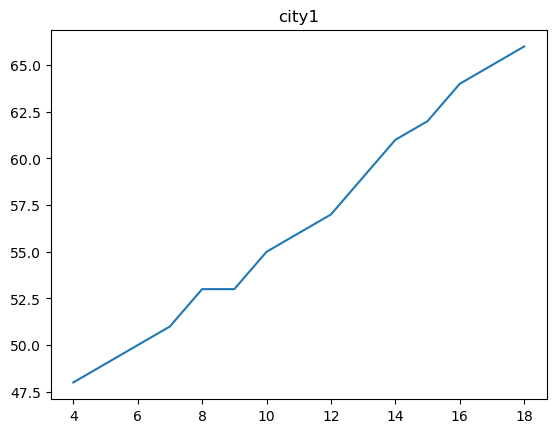

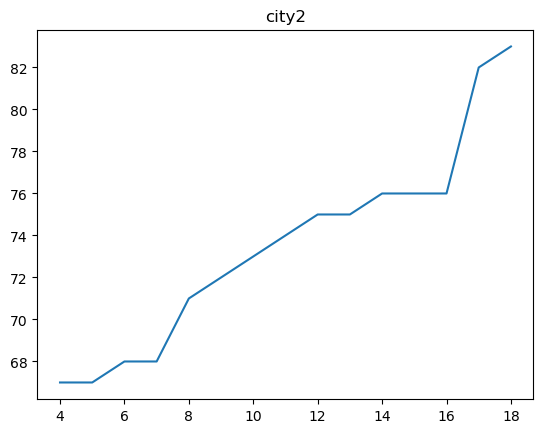

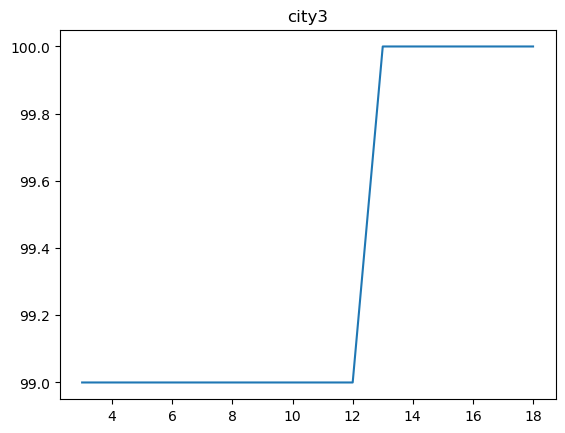

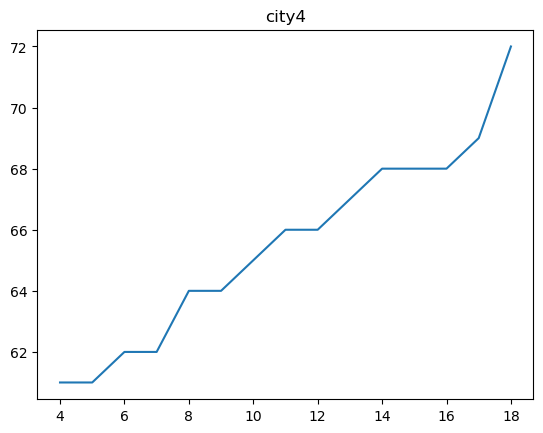

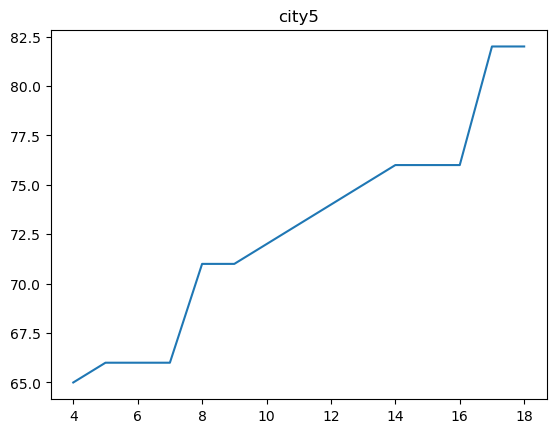

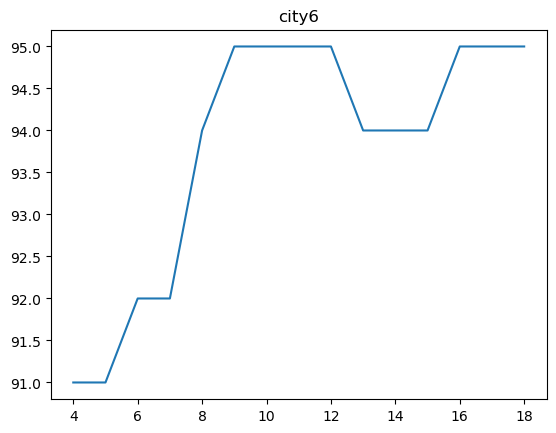

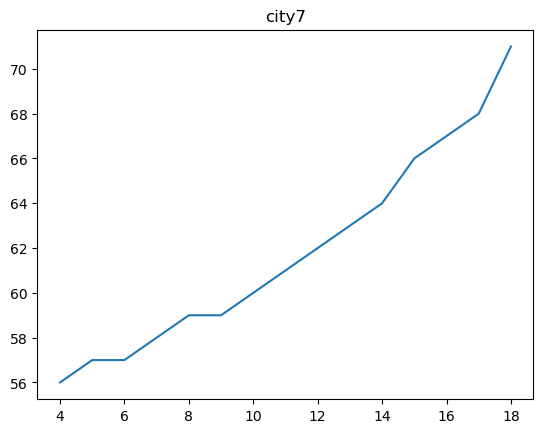

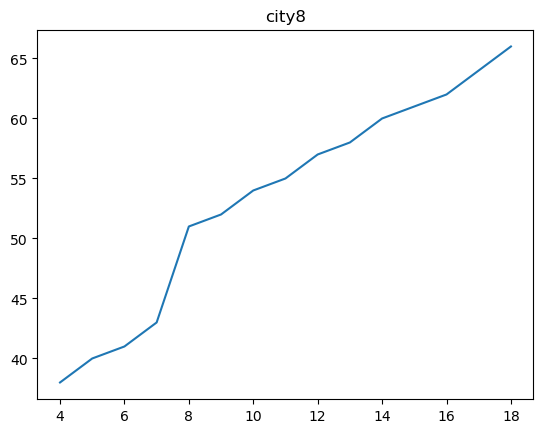

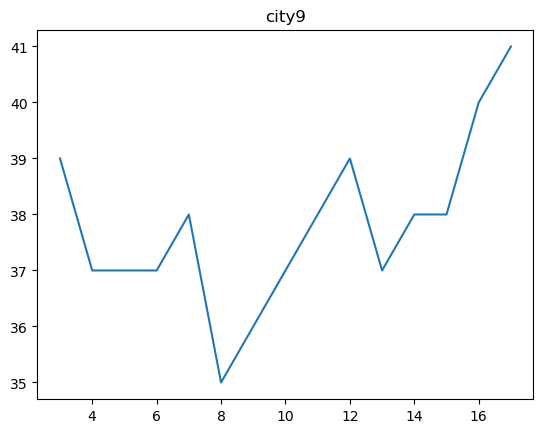

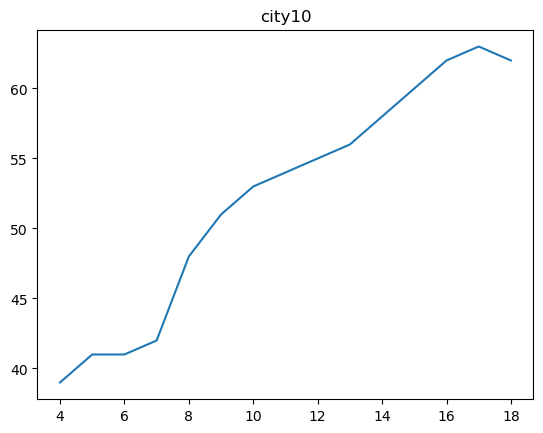

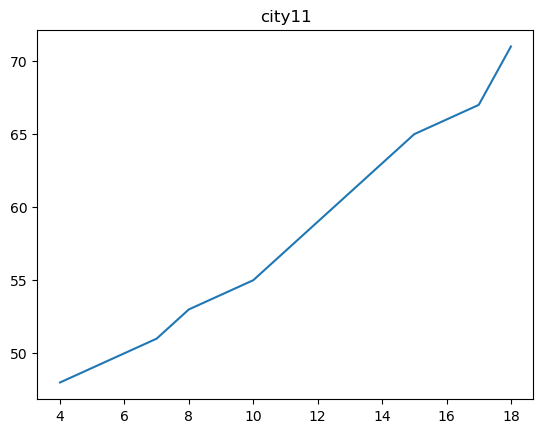

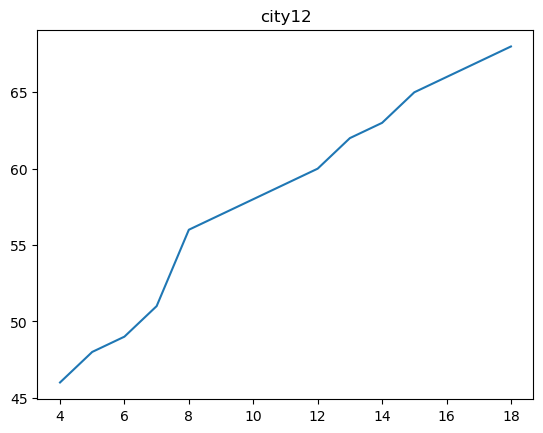

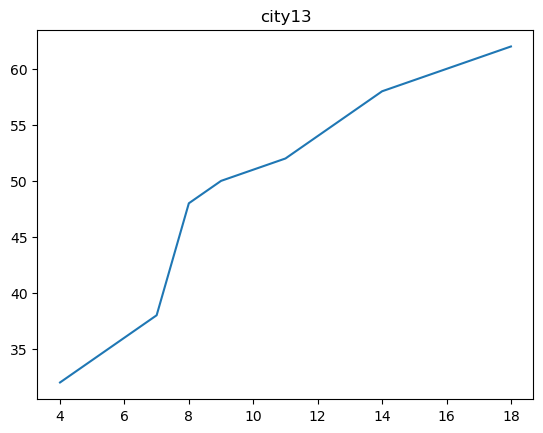

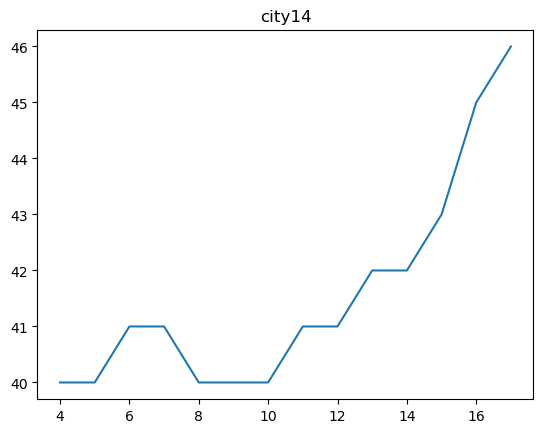

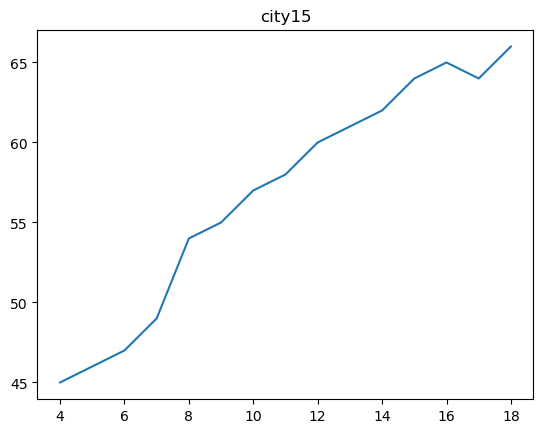

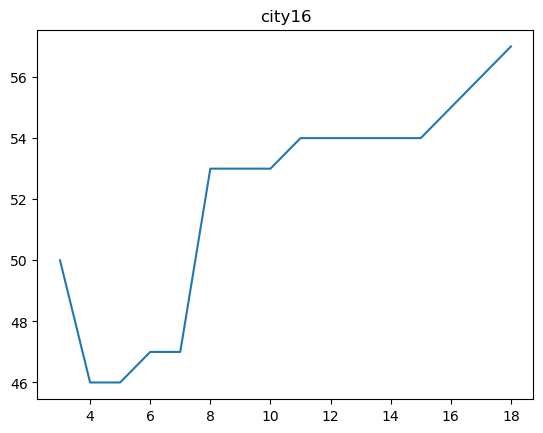

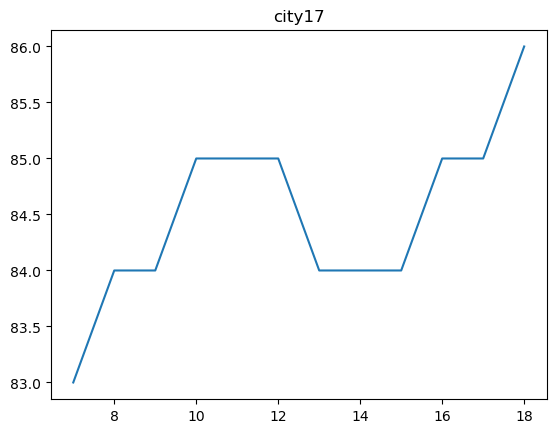

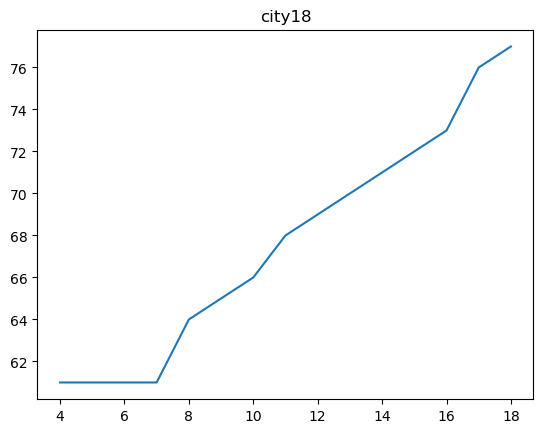

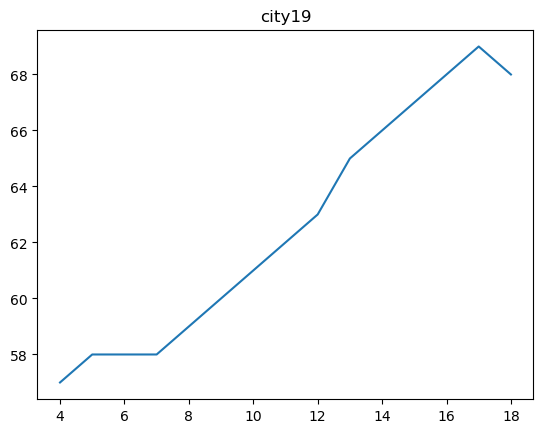

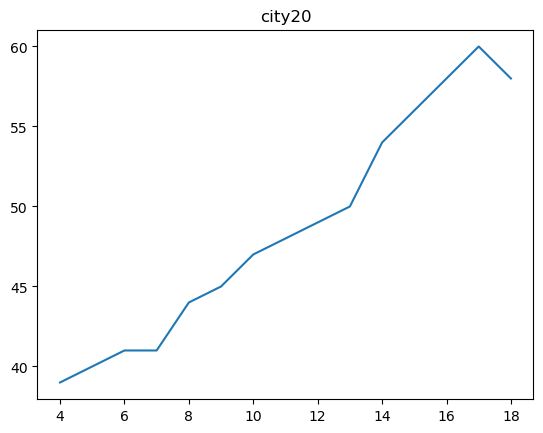

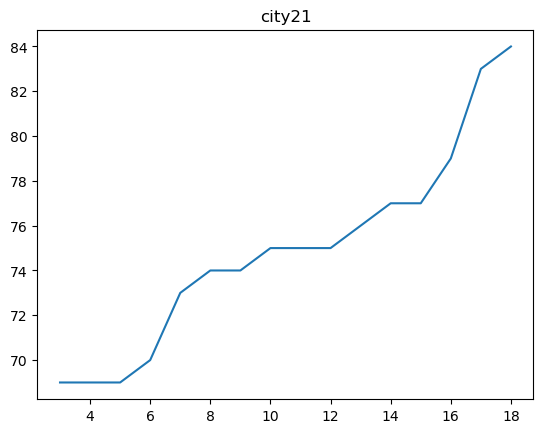

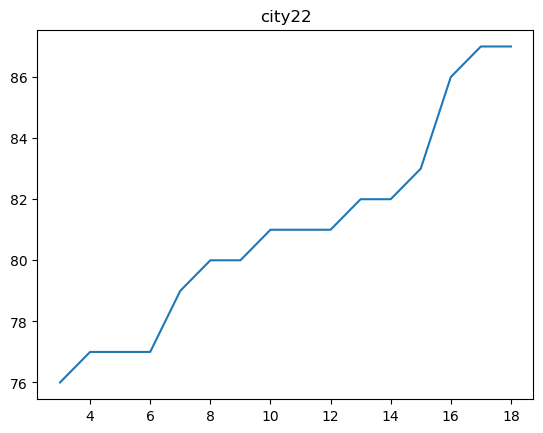

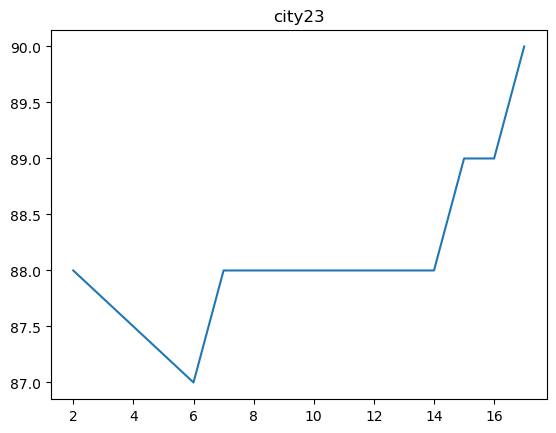

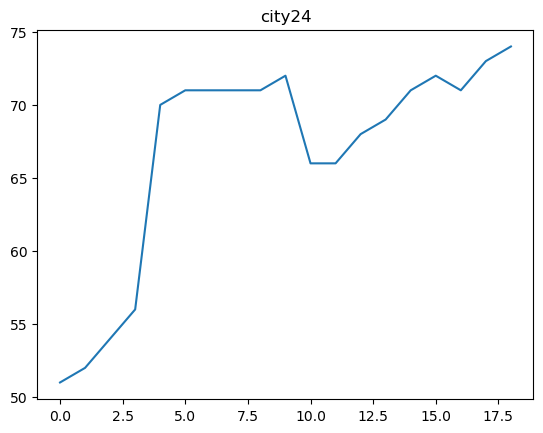

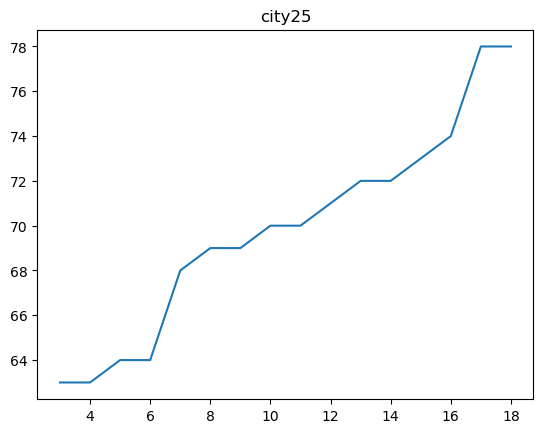

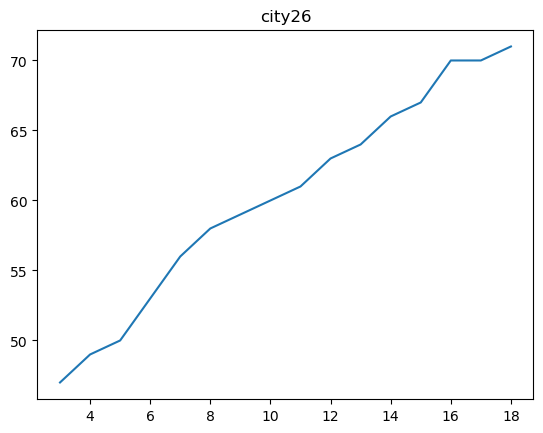

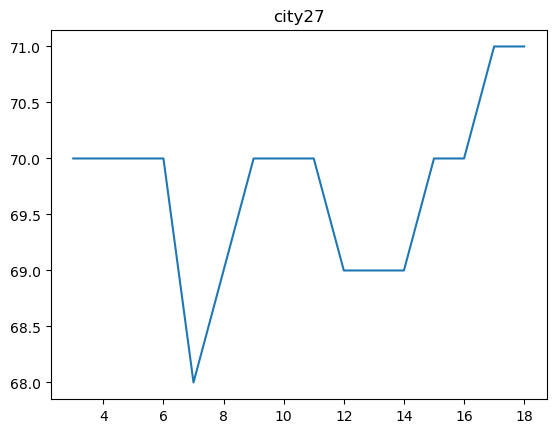

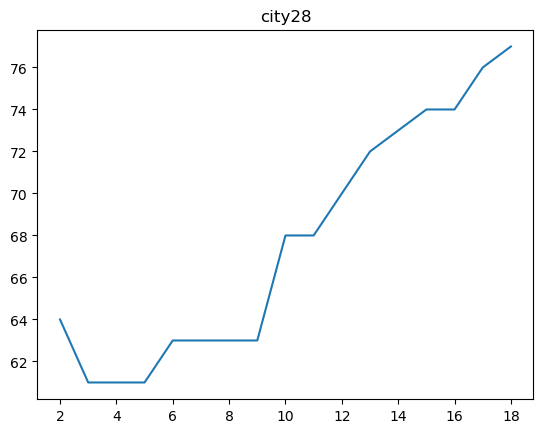

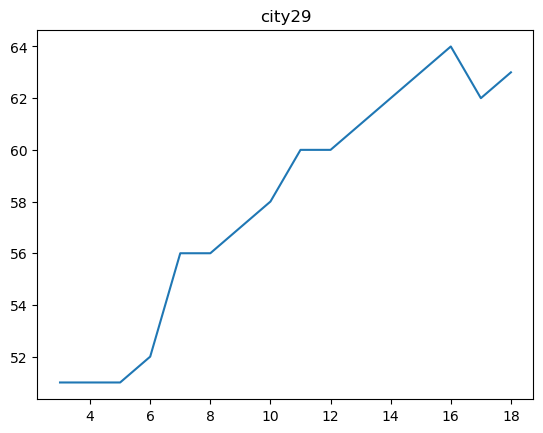

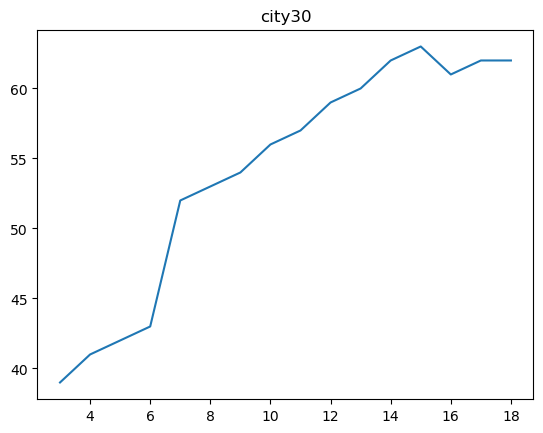

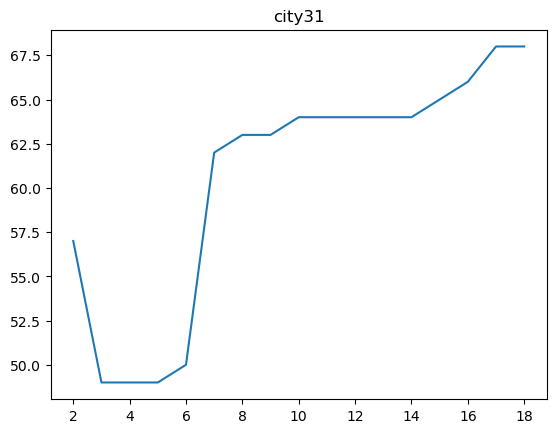

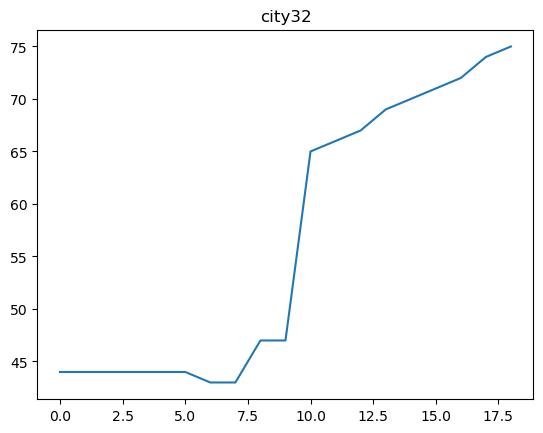

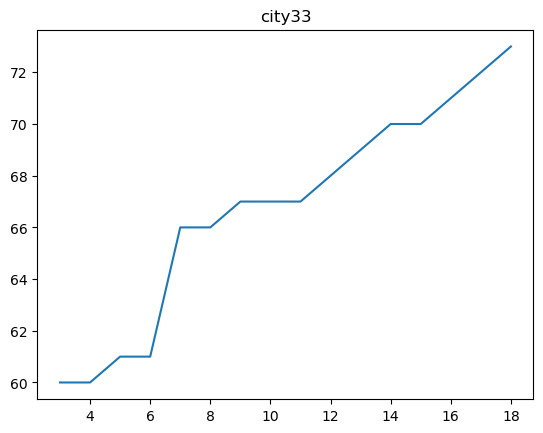

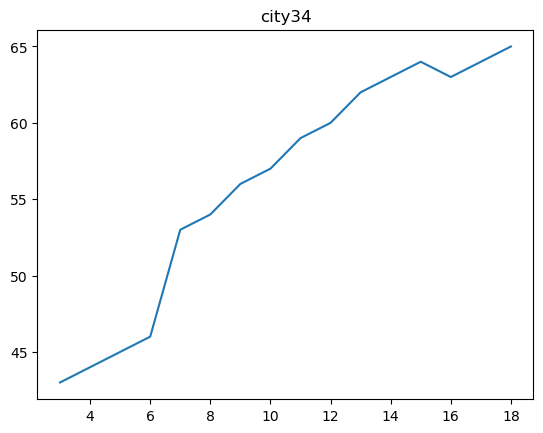

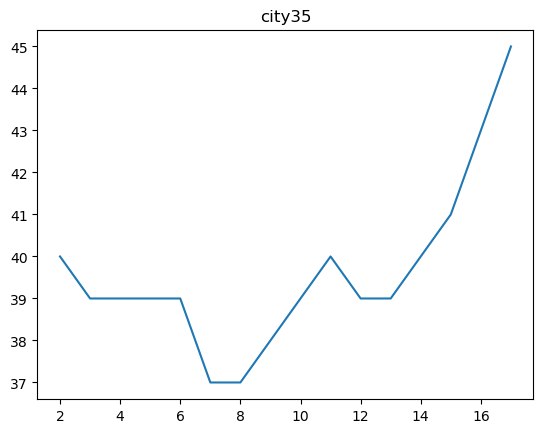

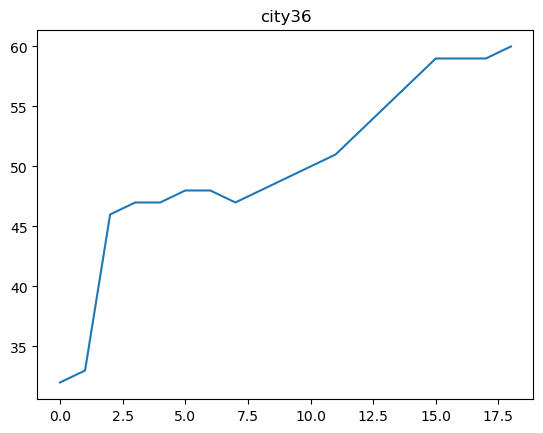

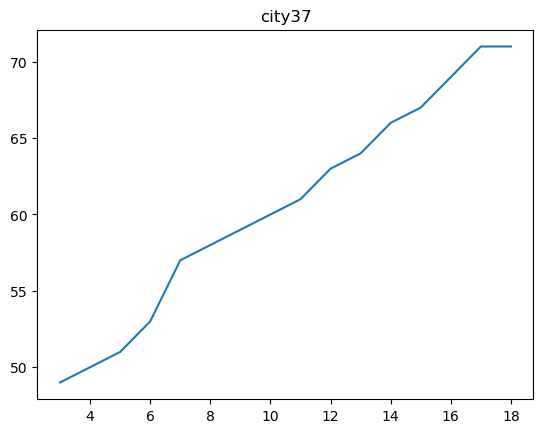

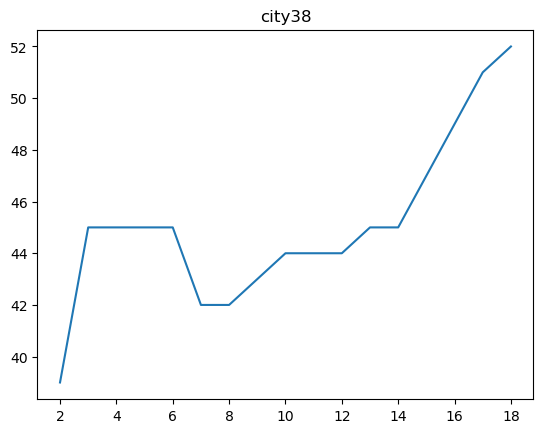

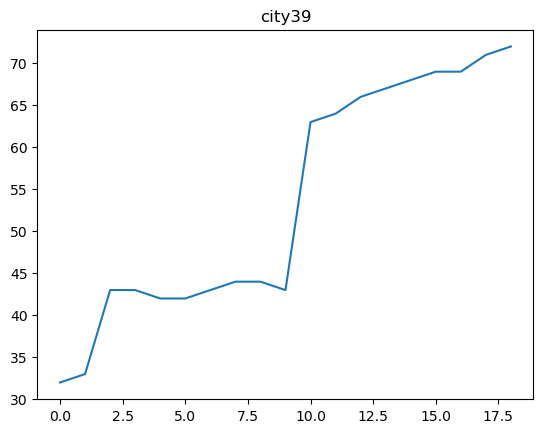

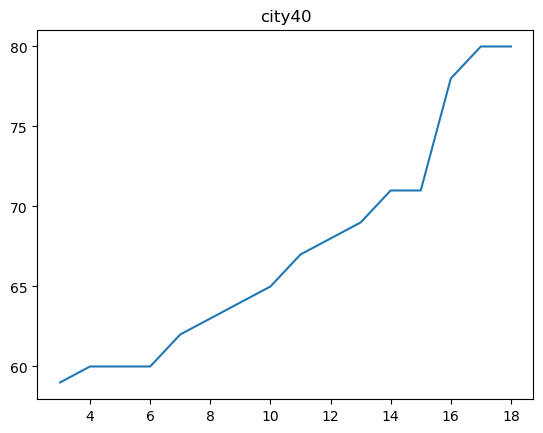

In [29]:
feature_name = 'urbanizationRate'
features_plot(feature_name)